<a href="https://colab.research.google.com/github/AikaHorizon333/pythonprojects/blob/main/Spotify_EDA_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify EDA and Classification Model Developement

The porpose of this experiment is to analyze which features are involved on the likeness of a songs and also measure which songs someone would like in a playlist using existing playlist by the user. 

## 1. Problem Definition

> Based on existing data determine which songs have more posibilities to be liked by an user. 

## 2. Data 
The data would be gathered using the Spotify Web API and the `spotipy` python library. 

* Is necessary to get the client access keys from the spotify developer's service. (https://developer.spotify.com/)
* The positive data will be extracted from my main playlist, I expect to gather around 1500 songs. 
* The negative data will be extract from a playlist with the songs that I dislike. 




## **The Data now will be imported from the csv file created bellow**

### Getting the data 

By using `spotipy`, extract the data from the main playlist 

Linking Process: 
1. Install spotipy using pip.
2. Import the main library and the Oauth library. 
3. Lend the keys. 

Retriving the data process: 
1. Function definition to extract more than 100 songs with the traditional method (https://stackoverflow.com/questions/39086287/spotipy-how-to-read-more-than-100-tracks-from-a-playlist)

2. Pass the user and playlist URI
3. Give the data the proper format to create a DataFrame 

In [ ]:
!pip install spotipy

In [ ]:
# Import spotipy and the authorization library
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
#### Connecting to Spotify ####
### Client Keys
## Client ID: 'ef9479c3541a44e0a90590f64a2c9232'
## Client Secret ID: '792c754b0e8149a0b45ac47fcbbc9488'


# Store the credentials
c_id = "ef9479c3541a44e0a90590f64a2c9232"
c_secret = "792c754b0e8149a0b45ac47fcbbc9488"

print("Connecting to Spotify...")
# Intanciate the Manager
manager = spotipy.SpotifyClientCredentials(client_id=c_id,client_secret=c_secret)

#Instanciate Spotify: 
sp = spotipy.Spotify(client_credentials_manager=manager)

print("Done!")


Connecting to Spotify...
Done!


In [ ]:
#Get the tracks from the Possitive Playlist

## User URI: spotify:user:22q2d3rexpbxtowmn43b3pqxy
## Playist URI: spotify:playlist:4DMISbLwni7m0WXeddWgcS

def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
   



In [ ]:
### Retrieving liked tracks.
print("Retriving Liked Tracks ... ")
liked_tracks = get_playlist_tracks("22q2d3rexpbxtowmn43b3pqxy","4DMISbLwni7m0WXeddWgcS")

print(f"Liked Tracks retrived: {len(liked_tracks)}")


#Once extracted the tracks, we need to get the ID in order to call for the 
#metadata. 

positive_ids = []
positive_names = []

for track in range(len(liked_tracks)):
  positive_ids.append(liked_tracks[track]["track"]["id"])
  positive_names.append(liked_tracks[track]["track"]["name"])

# This is no necessary I only did it for back up purposes
positive_track_dict = {}
for x in range(len(positive_ids)):
  positive_track_dict[positive_names[x]] = positive_ids[x]

# Getting individual features per track. 
# Example: spotify:track:3Xdl3dBamuhBVPX9y7Extm

#feature_ex = sp.audio_features('3Xdl3dBamuhBVPX9y7Extm')
#feature_ex[0]

# We can create a loop to fill a list with several songs.

# Retrieve the feature information from Spotify
positive_tracks = [] 

print("Retrieving Audio Features from {} tracks...".format(len(positive_ids)))
for id in positive_ids:
  positive_tracks.append(sp.audio_features(id))

#Cleaning the extracted info... 

len(positive_tracks)

positive_features=[None]*len(positive_tracks)

print("Cleaning data for {} tracks...".format(len(positive_tracks)))

for i in range(len(positive_tracks)):
  positive_features[i] = positive_tracks[i][0]

print("Done!")

Retriving Liked Tracks ... 
Liked Tracks retrived: 1511
Retrieving Audio Features from 1511 tracks...
Cleaning data for 1511 tracks...
Done!


In [ ]:
## Getting the Negative Playlist: 
## User URI: spotify:user:22q2d3rexpbxtowmn43b3pqxy
## Playist URI: spotify:playlist:6wclFNnPmuue5Dei9z5qBp

#Retrive the Negative Tracks
print("Retriving Disliked Tracks...")
disliked_tracks = get_playlist_tracks("22q2d3rexpbxtowmn43b3pqxy","6wclFNnPmuue5Dei9z5qBp")

print("Negative tracks retrived: {}".format(len(disliked_tracks)))

# Getting the ID for the negatives...

negative_ids = []
negative_names = []

for track in range(len(disliked_tracks)):
  negative_ids.append(disliked_tracks[track]["track"]["id"])
  negative_names.append(disliked_tracks[track]["track"]["name"])

#Backing up the negatives... 
negative_track_dict ={}
for x in range(len(negative_ids)):
  negative_track_dict[negative_names[x]]=negative_ids[x]

#Retrieve information from Spotify: 

negative_tracks = []

print(f"Retrieving Audio Features for {len(negative_ids)}...")

for id in negative_ids: 
  negative_tracks.append(sp.audio_features(id))

#Cleaning Negative Data
len(negative_tracks)

negative_features = [None]*len(negative_tracks)

print("Cleaning data for {} tracks...".format(len(negative_tracks)))

for i in range(len(negative_tracks)):
  negative_features[i] = negative_tracks[i][0]

print("Done!")





Retriving Disliked Tracks...
Negative tracks retrived: 941
Retrieving Audio Features for 941...
Cleaning data for 941 tracks...
Done!


## 3. Evaluation

> Since there is no objective way to predict if someone would like a song, a score of 70% of prediction from the model will be sufficient to aprove the model. 

## 4. Features 

According to the *Spotify Web API* documentation, a song has the following features: 

*Subjective Features*:
* **danceability**: Score that ranges between 0 to 1 that determines how danceable a track is. Zero is less danceable while one is highly danceable.

* **energy**: Score that ranges between 0 to 1 that determines how energetic a track is. Atributes that contribute to this score are: dynamic range, percived loudness, timber, onset rate, general entropy.

  While death metal will have high energy score, a Bach prelude will have lower scores.

* **speechiness**: The speachiness score indicates if there are spoken words inside a track. Values above 0.66 indicate that the track is highly made of spoken material, while values between 0.66 and 0.33 is material that includes a combination of instrumetal but high amount of spoken words, like rap music. Values under 0.33 represent music.

* **acousticness**: Score from 0 to 1 to determine the confidence if a track is acoustic. A value of 1.0 indicates a high confidence on a track being acoustic.

* **instrumentalness**: Predicts if a track has no vocals. The closer the value is to 1.0 the likely is to no contain vocals. Values above 0.5 indicates that is maybe an instrumental track, the higher the value the confident it will become. 

* **liveness**: Score from 0 to 1. Detects the presence of an audience in the track. Values above 0.8 the higer the probability of the track being performed live. 

* **valence**: A measure from 0 to 1. This score describes the musical positiveness on a track. Tracks with higher valence sound more positive ( happy, cheerful, euphoric) while low values sound more negative ( sad, depressed, angry). 




Objective Features: 

* **tempo**: The overall estimated tempo in Beats Per Minute of a track.

* **duration_ms**: Duration in milliseconds of the track.

* **time_signature**: Estimated time signature of the track. 

* **key** : The key the track is in. 0 being C and 11 being B.

* **loudness**: The estimated loudness in the overall track in dB. 
Loudness values are averaged across the entire tracks. Is usefull to compare the loudness between tracks.  

* **mode**:  Determines if a song is in minor or in a major key. Major is represented by 1 and minor by 0.

(more on: https://opendatascience.com/a-machine-learning-deep-dive-into-my-spotify-data/)

Discarded features that only refere to the metadata of the song and dont provide relevant information:
* *type*: The object type: "audio_features"

* *id*: The id of the track

* *uri*: Spotify URI of the track

* *track_href*: Link to the Web API of the track.

* *analysis_url*: HTTP URL to access to the full audio analysis of the track. 





### Importing Regular EDA and Ploting Tools

Notebook caring: 
*numpy, pandas, matplotlib, seaborn*

Classification Models from Scikit Learn: 
*LogisticRegression, KNearestNeighbors, RandomForesClassifier*

Evaluation tools: 
*train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, confussion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve* 


In [ ]:
#Notebook caring
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

# ignore Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

### Importing the Data for EDA 



In [ ]:
# Import the Positive  and Negative Features
positive_df = pd.DataFrame(positive_features)
negative_df = pd.DataFrame(negative_features)

# Non useful features
non_useful_features =["type","uri","track_href","analysis_url"]

#Dropping features
for feature in non_useful_features:
  positive_df = positive_df.drop(feature,axis=1)
  negative_df = negative_df.drop(feature, axis=1)

# Setting targets
positive_df["target"]=1
negative_df["target"]=0




### First Data Insights

Things to look for: 

1. Count of NaN values.
2. Datatypes on the dataframes. 

This is important to make decisions based on the type of data retrieved and which aproach to take on missing data.



In [ ]:
# Getting the shapes of the DataFrames

print(f"Data in Positive Dataframe: {positive_df.shape[0]}")
print(f"Data in Negative Dataframe: {negative_df.shape[0]}")

Data in Positive Dataframe: 1511
Data in Negative Dataframe: 941


In [ ]:
# pandas info() to have a general picture about the quality(?) of the data.
positive_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1511 non-null   float64
 1   energy            1511 non-null   float64
 2   key               1511 non-null   int64  
 3   loudness          1511 non-null   float64
 4   mode              1511 non-null   int64  
 5   speechiness       1511 non-null   float64
 6   acousticness      1511 non-null   float64
 7   instrumentalness  1511 non-null   float64
 8   liveness          1511 non-null   float64
 9   valence           1511 non-null   float64
 10  tempo             1511 non-null   float64
 11  id                1511 non-null   object 
 12  duration_ms       1511 non-null   int64  
 13  time_signature    1511 non-null   int64  
 14  target            1511 non-null   int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 177.2+ KB


In [ ]:
negative_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      941 non-null    float64
 1   energy            941 non-null    float64
 2   key               941 non-null    int64  
 3   loudness          941 non-null    float64
 4   mode              941 non-null    int64  
 5   speechiness       941 non-null    float64
 6   acousticness      941 non-null    float64
 7   instrumentalness  941 non-null    float64
 8   liveness          941 non-null    float64
 9   valence           941 non-null    float64
 10  tempo             941 non-null    float64
 11  id                941 non-null    object 
 12  duration_ms       941 non-null    int64  
 13  time_signature    941 non-null    int64  
 14  target            941 non-null    int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 110.4+ KB


### Resume and Feature Engineering 
The first data insight reveal that there is not missing data and we have pure numerical types. 

We have two categorical feaures, Key and Mode. The rest are numerical features. 

* The id feature is only for identification purposes. 

However it is necessary to simplify some feature into other more readable form and it will be usefull to fit a new dataframe that joins both playlist to ease analysis and manipulation. 



In [ ]:
# Creating a new dataframe

existing_df = [positive_df, negative_df]

songs_df = pd.concat(existing_df, ignore_index=True)

songs_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,target
0,0.217,0.703,6,-6.957,1,0.0445,0.006170,0.897000,0.1110,0.238,128.009,1ZdDjrw2wdX2Ehe7J6GQr3,368627,4,1
1,0.316,0.951,1,-3.757,0,0.1120,0.000025,0.189000,0.1700,0.255,174.895,052C0m9kD30nZqcPWPPRqm,243347,4,1
2,0.447,0.983,5,-2.281,1,0.2680,0.015700,0.000000,0.2760,0.317,179.072,3mScGCzxiXA9OaHdBeuk7O,248947,4,1
3,0.455,0.952,1,-6.382,0,0.0787,0.023200,0.000056,0.0662,0.332,90.365,70p3HYq9iHZisJqpDmWd1U,310680,4,1
4,0.314,0.729,7,-7.391,1,0.0452,0.001520,0.670000,0.0793,0.149,127.322,65BdSk4j40k1dSIvdb1vjX,592267,4,1


In [ ]:
# Creating the "duration_min" feature_

to_minutes = lambda x: x/(1000*60)

songs_df["duration_m"] = to_minutes(songs_df.duration_ms)

#Ordering the Data Frame.
songs_df = songs_df[["id","danceability","energy","speechiness","acousticness","instrumentalness","liveness","valence",
                     "duration_ms","duration_m","tempo","time_signature","key","mode","loudness","target"]]

songs_df.head(7)

,id,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,duration_m,tempo,time_signature,key,mode,loudness,target
0,1ZdDjrw2wdX2Ehe7J6GQr3,0.217,0.703,0.0445,0.006170,0.897000,0.1110,0.238,368627,6.143783,128.009,4,6,1,-6.957,1
1,052C0m9kD30nZqcPWPPRqm,0.316,0.951,0.1120,0.000025,0.189000,0.1700,0.255,243347,4.055783,174.895,4,1,0,-3.757,1
2,3mScGCzxiXA9OaHdBeuk7O,0.447,0.983,0.2680,0.015700,0.000000,0.2760,0.317,248947,4.149117,179.072,4,5,1,-2.281,1
3,70p3HYq9iHZisJqpDmWd1U,0.455,0.952,0.0787,0.023200,0.000056,0.0662,0.332,310680,5.178000,90.365,4,1,0,-6.382,1
4,65BdSk4j40k1dSIvdb1vjX,0.314,0.729,0.0452,0.001520,0.670000,0.0793,0.149,592267,9.871117,127.322,4,7,1,-7.391,1
5,23GPukKpKKdSHwXKuNvpdE,0.419,0.855,0.0444,0.000133,0.159000,0.1100,0.225,398427,6.640450,104.981,4,5,0,-5.659,1
6,38cEFxU4h05Aa0BgzWrNyy,0.240,0.548,0.0324,0.006090,0.875000,0.0941,0.127,350320,5.838667,127.342,4,1,0,-8.378,1


In [ ]:
#Save the Traing_Test dataframe

#songs_df.to_csv("songs_dataframe.csv")

### NEW START 

To ease processing now the data will be loaded from the csv created above.

In [ ]:
#Load from file. 
songs_df = pd.read_csv("songs_dataframe.csv").drop("Unnamed: 0", axis=1)
songs_df.tail()


,id,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,duration_m,tempo,time_signature,key,mode,loudness,target
2448,1uFl33ahAD59XrccuSxpkz,0.399,0.398,0.0335,0.0568,0.0,0.281,0.483,220155,3.669250,159.810,4,0,1,-7.309,0
2449,5cWIowEZxB2FkZ1Hzqpwjl,0.826,0.928,0.0336,0.1810,0.0,0.296,0.967,165787,2.763117,139.033,4,11,0,-4.181,0
2450,71iAechwVKGu26pahzFL0k,0.806,0.778,0.0616,0.1330,0.0,0.218,0.840,219587,3.659783,95.993,4,1,0,-4.577,0
2451,6z1wOs7wdx5HSn6PMDoc4s,0.612,0.748,0.0462,0.6540,0.0,0.115,0.416,211046,3.517433,147.978,4,2,1,-5.503,0
2452,5T1MmDTBxXdCzIK0d76fQs,0.741,0.191,0.0451,0.8020,0.0,0.127,0.351,118728,1.978800,112.567,3,7,1,-9.879,0


### Interpreting the Dataframe: 

How to read the information in the data frame: 

For the first value: 

* id: 1ZdDjrw2wdX2Ehe7J6GQr3 - Souvenirs d'un autre monde 
* danceability: 0.217 - Not so danceable
* energy: 0.703 - Somewhat energetic
* acousticness: 0.006170 - Not really acoustic. 
* instrumentalness: 0.897000 - Somewhat instrumental
* liveness: 0.1110 - Low probability of being a live recording. 
* valence: 0.23 - Nostalgic feel (?) (negative feel)
* duration_ms: 368627 ms
* duration_m: 6.143783 minutes 
* tempo: 128.009 BPM
* time_signature: 4/4
* key: 6 - $\sharp{F}$ or $\flat{G}$
* mode: 1 - major mode 
* loudness: -6.957 dB
* target: 1 - liked track




### Visualizing Data

Creatting a Histogram of the playlist features to get a better insight on how the features distributed across both playlist and look for the difference on both sets. 

**Subjective Analysis # 1**

* Danceability - How  danceable are the tracks? What is the most comon value and how is the distribution? 

* Energy - How energetic are the tracks? Which kind of tracks prevail?

* Speechiness - Is there a common speechiness value between the two sets?  or is there a difference?

* Accousticness - Is there any acoustic characteristic in both sets? How is the distribution of that value? 

* Instrumentalness - How common are instrumental tracks in both playlist, Is there an existing preference? 

* Valence - How is the mood preference among the tracks, their frequency and distribution ? Sad songs over Happy songs? 

**Subjective Analysis # 2**

* Comparision between Valence and Danceability - How the main mood relates to the danceability of a track? and How is the distribution between the sets? 

* Comparision between Valence and Energy - How the main mood realates to the energy of the tracks in the sets ? Is there a relationship for a track to be liked ? 

**Objective Analysis**

* Duration - Is there a prefered duration among playlist ? 

* Tempo - How is the distribution of the BPM value among values in both sets? Is there a relationship? 

* Mode - How is the mode distribution among the sets? Is there a preference between Major and Minor modes? 

* Key - Is there a prefered key in which a song is meant to be? 

* Time signature - Is there a prefered time signature among playlist ? 



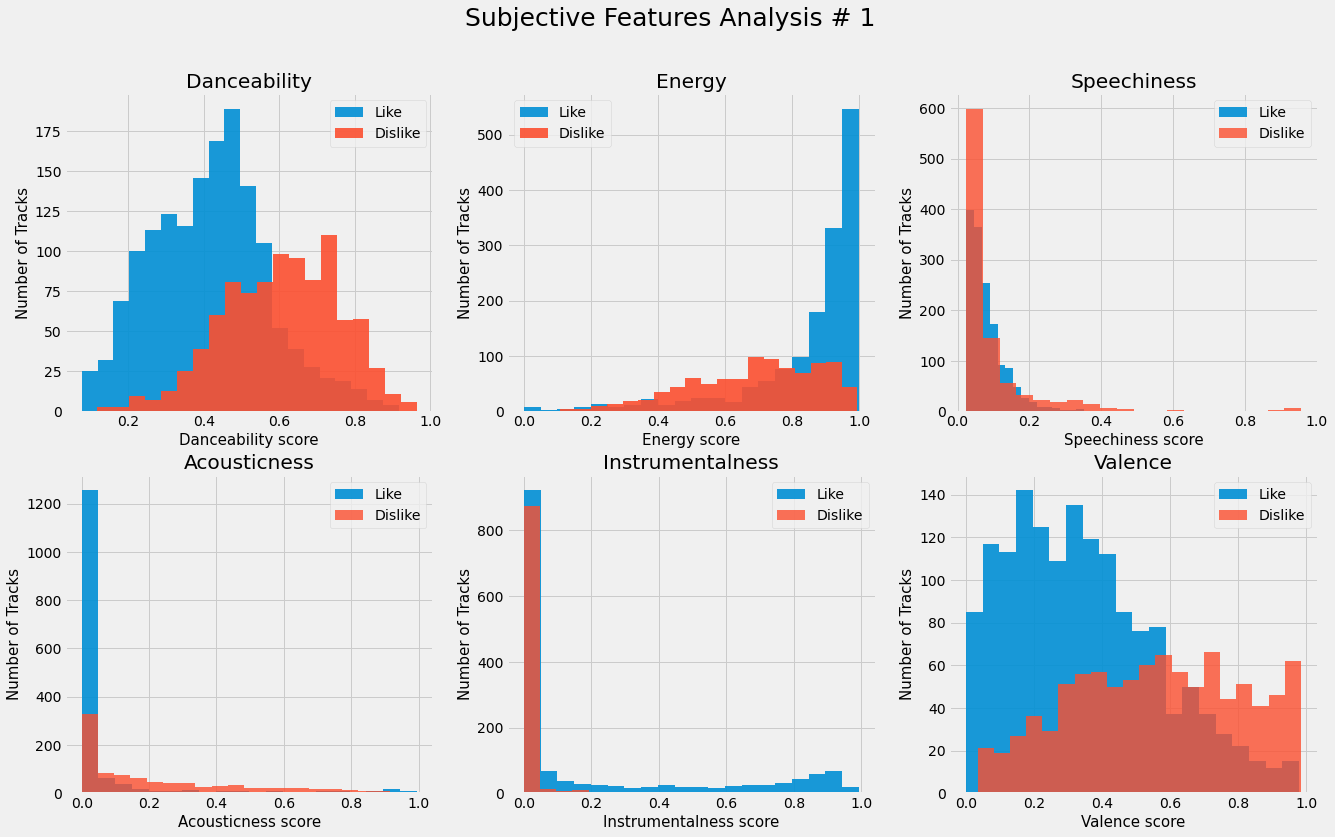

In [ ]:
# Subjective Analysis # 1 

# Creating the figure object
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(2,3, figsize=(20,12))
fig.suptitle("Subjective Features Analysis # 1", fontsize=25)

#Danceability Histogram
ax[0][0].hist(songs_df.danceability[songs_df.target==1], bins=20, alpha=0.9);
ax[0][0].hist(songs_df.danceability[songs_df.target==0], bins=20, alpha=0.9)
ax[0][0].set_title("Danceability")
ax[0][0].set_xlabel("Danceability score", fontsize=15)
ax[0][0].set_ylabel("Number of Tracks", fontsize=15)
ax[0][0].legend(["Like","Dislike"])

# Energy Histogram
ax[0][1].hist(songs_df.energy[songs_df.target==1], bins=20, alpha=0.9)
ax[0][1].hist(songs_df.energy[songs_df.target==0], bins=20, alpha=0.9)
ax[0][1].set_title("Energy")
ax[0][1].set_xlabel("Energy score", fontsize=15)
ax[0][1].set_ylabel("Number of Tracks", fontsize=15)
ax[0][1].legend(["Like","Dislike"])


#Speechiness Histogram
ax[0][2].hist(songs_df.speechiness[songs_df.target==1], bins=20, alpha=0.9)
ax[0][2].hist(songs_df.speechiness[songs_df.target==0], bins=20, alpha=0.8)
ax[0][2].set_title("Speechiness")
ax[0][2].set_xlabel("Speechiness score", fontsize=15)
ax[0][2].set_ylabel("Number of Tracks", fontsize=15)
ax[0][2].legend(["Like","Dislike"])


#Acousticness Histogram
ax[1][0].hist(songs_df.acousticness[songs_df.target==1], bins=20, alpha=0.9)
ax[1][0].hist(songs_df.acousticness[songs_df.target==0], bins=20, alpha=0.8)
ax[1][0].set_title("Acousticness")
ax[1][0].set_xlabel("Acousticness score", fontsize=15)
ax[1][0].set_ylabel("Number of Tracks", fontsize=15)
ax[1][0].legend(["Like","Dislike"])


#Instrumentalness Histogram
ax[1][1].hist(songs_df.instrumentalness[songs_df.target==1], bins=20, alpha=0.9)
ax[1][1].hist(songs_df.instrumentalness[songs_df.target==0], bins=20, alpha=0.8)
ax[1][1].set_title("Instrumentalness")
ax[1][1].set_xlabel("Instrumentalness score", fontsize=15)
ax[1][1].set_ylabel("Number of Tracks", fontsize=15)
ax[1][1].legend(["Like","Dislike"])

#Valence Histogram
ax[1][2].hist(songs_df.valence[songs_df.target==1], bins=20, alpha=0.9)
ax[1][2].hist(songs_df.valence[songs_df.target==0], bins=20, alpha=0.8)
ax[1][2].set_title("Valence")
ax[1][2].set_xlabel("Valence score", fontsize=15)
ax[1][2].set_ylabel("Number of Tracks", fontsize=15)
ax[1][2].legend(["Like","Dislike"]);

**Subjective Analysis #1** 

From this first analysis the positive playlist is oriented to **low** values of Danceability and Valence while having high values in Energy. 

Aditionally there is a higher variance among the instrumental value in the positive set than in the negative set. 

**Low danceability, Negative Mood, and High energy.**



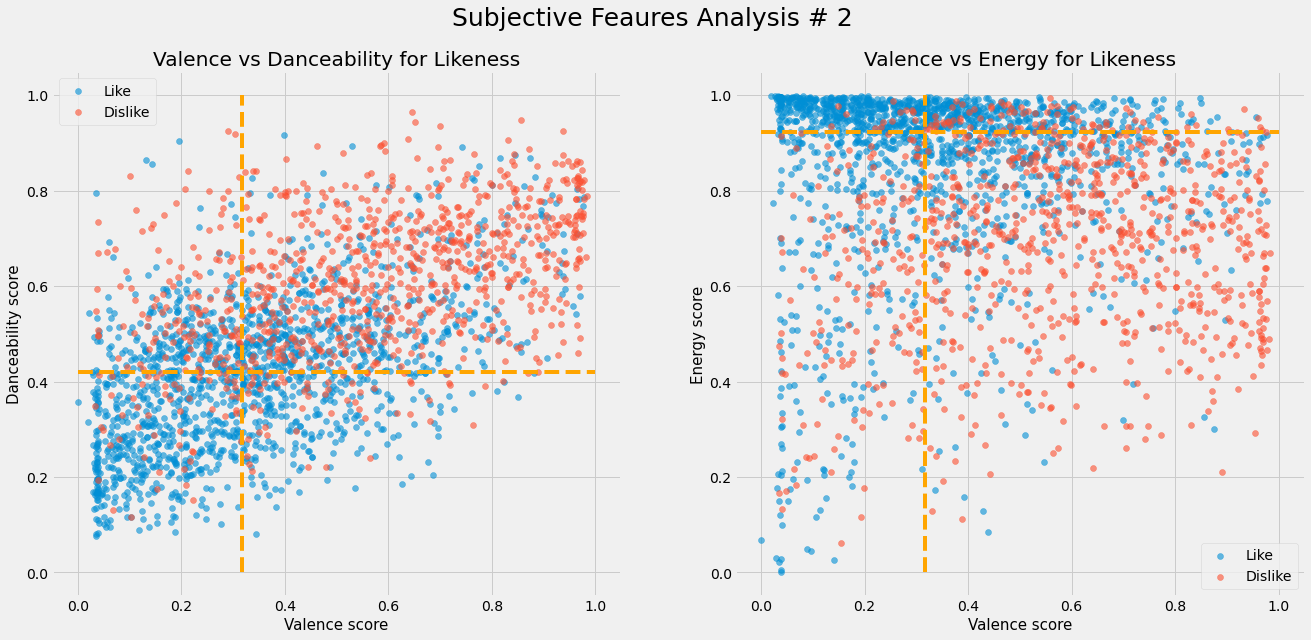

In [ ]:
# Subjective Analysis #2 

fig,ax = plt.subplots(1,2, figsize=(20,9))
fig.suptitle("Subjective Feaures Analysis # 2 ", fontsize=25)

# Valence vs Danceability
ax[0].scatter(songs_df.valence[songs_df.target==1], songs_df.danceability[songs_df.target==1], alpha=0.6)
ax[0].scatter(songs_df.valence[songs_df.target==0], songs_df.danceability[songs_df.target==0], alpha=0.6)

#Median
ax[0].hlines(songs_df.danceability[songs_df.target==1].median(),0,1, linestyle="--", colors="orange")
ax[0].vlines(songs_df.valence[songs_df.target==1].median(), 0, 1, linestyle="--", colors="orange")

#Labels
ax[0].set_title("Valence vs Danceability for Likeness")
ax[0].set_xlabel("Valence score", fontsize=15)
ax[0].set_ylabel("Danceability score", fontsize=15)
ax[0].legend(["Like","Dislike"])

# Valence vs Energy
ax[1].scatter(songs_df.valence[songs_df.target==1], songs_df.energy[songs_df.target==1], alpha=0.6)
ax[1].scatter(songs_df.valence[songs_df.target==0], songs_df.energy[songs_df.target==0], alpha=0.6)

#Median
ax[1].hlines(songs_df.energy[songs_df.target==1].median(), 0, 1, linestyle="--", colors="orange")
ax[1].vlines(songs_df.valence[songs_df.target==1].median(), 0, 1, linestyle="--", colors="orange")

#Labels
ax[1].set_title("Valence vs Energy for Likeness")
ax[1].set_xlabel("Valence score", fontsize=15)
ax[1].set_ylabel("Energy score", fontsize=15)
ax[1].legend(["Like","Dislike"]);



**Subjective Analysis # 2**

From the general datase is likely that a song will have higher probability to be liken if it has a valence scores lower than 0.31, a danceability score lower than 0.42 and a energy score above 0.92. 

The plots above show the *hot areas* where is likely to find a positive value  around those limits. 

On the other hand the negative values tend to scatter arround higher values of daceability, valence and lower values of energy.

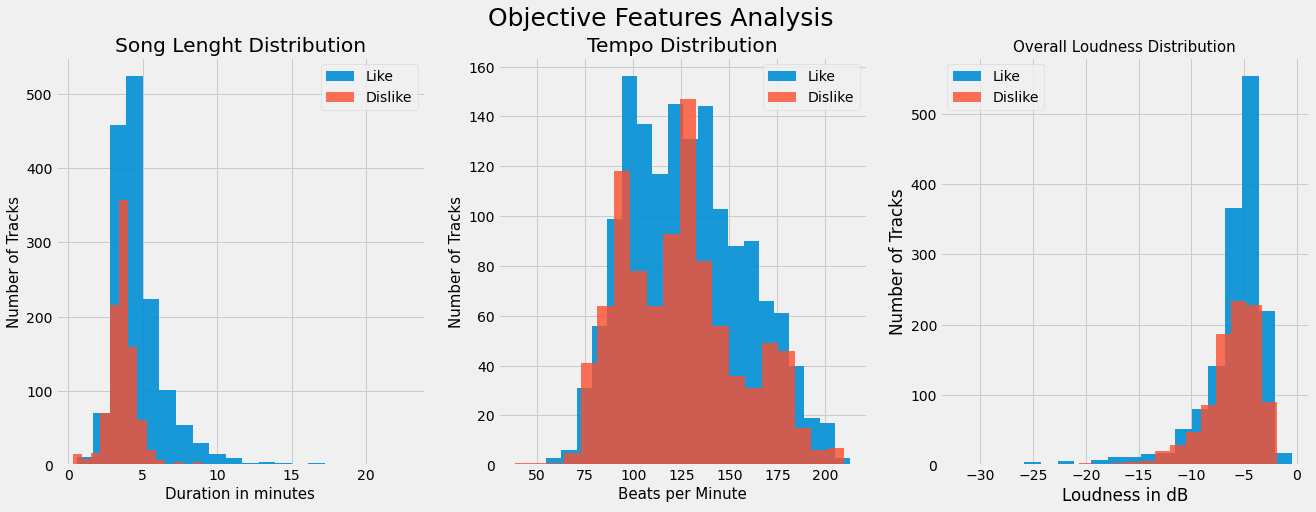

In [ ]:
# Objective Analysis

fig, ax = plt.subplots(1, 3, figsize=(20,7))
fig.suptitle("Objective Features Analysis", fontsize=25)

# Duration in Minutes
ax[0].hist(songs_df.duration_m[songs_df.target==1], bins=20, alpha=0.9)
ax[0].hist(songs_df.duration_m[songs_df.target==0], bins=20, alpha=0.8)
ax[0].set_title("Song Lenght Distribution")
ax[0].set_xlabel("Duration in minutes", fontsize=15)
ax[0].set_ylabel("Number of Tracks", fontsize=15)
ax[0].legend(["Like","Dislike"])

# Tempo distribution. 
ax[1].hist(songs_df.tempo[songs_df.target==1], bins=20, alpha=0.9)
ax[1].hist(songs_df.tempo[songs_df.target==0], bins=20, alpha=0.8)
ax[1].set_title("Tempo Distribution")
ax[1].set_xlabel("Beats per Minute", fontsize=15)
ax[1].set_ylabel("Number of Tracks", fontsize=15)
ax[1].legend(["Like","Dislike"]);

#Loudness
ax[2].hist(songs_df.loudness[songs_df.target==1], bins=20, alpha=0.9)
ax[2].hist(songs_df.loudness[songs_df.target==0], bins=20, alpha=0.8)
ax[2].set_title("Overall Loudness Distribution", fontsize=15)
ax[2].set_xlabel("Loudness in dB")
ax[2].set_ylabel("Number of Tracks")
ax[2].legend(["Like","Dislike"])


In [ ]:
songs_df[songs_df.target==1].describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,duration_m,tempo,time_signature,key,mode,loudness,target
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1.512000e+03,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.0
mean,0.415448,0.848228,0.083454,0.065267,0.214190,0.237557,0.344107,2.842326e+05,4.737210,128.389564,3.882937,5.156085,0.533730,-5.987983,1.0
std,0.154296,0.188967,0.056642,0.185429,0.326516,0.197953,0.218258,1.163878e+05,1.939797,30.473774,0.397110,3.486873,0.499026,3.423929,0.0
min,0.076200,0.000171,0.024000,0.000000,0.000000,0.017400,0.000000,3.481300e+04,0.580217,54.669000,1.000000,0.000000,0.000000,-32.208000,1.0
25%,0.296750,0.813000,0.044300,0.000046,0.000043,0.098650,0.173000,2.172968e+05,3.621613,103.992250,4.000000,2.000000,0.000000,-6.693500,1.0
50%,0.420000,0.923000,0.066950,0.000666,0.008110,0.165500,0.317000,2.558425e+05,4.264042,126.015000,4.000000,5.000000,1.000000,-5.106000,1.0
75%,0.510000,0.968000,0.104000,0.016125,0.392000,0.321250,0.484000,3.153435e+05,5.255725,149.960750,4.000000,8.000000,1.000000,-4.107500,1.0
max,0.917000,0.999000,0.460000,0.994000,0.993000,0.991000,0.978000,1.367093e+06,22.784883,212.808000,5.000000,11.000000,1.000000,-0.447000,1.0


In [ ]:
songs_df[songs_df.target==0].describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,duration_m,tempo,time_signature,key,mode,loudness,target
count,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.0
mean,0.605539,0.686904,0.100327,0.228112,0.031174,0.209474,0.557860,220969.097768,3.682818,124.681114,3.910733,5.408077,0.656748,-6.205356,0.0
std,0.151760,0.192511,0.129885,0.249319,0.134735,0.170092,0.248134,59886.118227,0.998102,30.601190,0.389355,3.641852,0.475047,2.796346,0.0
min,0.117000,0.061300,0.023500,0.000006,0.000000,0.027100,0.033700,19133.000000,0.318883,38.454000,1.000000,0.000000,0.000000,-29.286000,0.0
25%,0.497000,0.554000,0.036400,0.016800,0.000000,0.095700,0.362000,192707.000000,3.211783,99.040000,4.000000,2.000000,0.000000,-7.273000,0.0
50%,0.613000,0.713000,0.050400,0.135000,0.000001,0.141000,0.561000,219333.000000,3.655550,124.631000,4.000000,6.000000,1.000000,-5.700000,0.0
75%,0.722000,0.846000,0.099300,0.379000,0.000131,0.283000,0.755000,244804.000000,4.080067,143.945000,4.000000,9.000000,1.000000,-4.339000,0.0
max,0.964000,0.995000,0.956000,0.964000,0.961000,0.972000,0.984000,760973.000000,12.682883,209.774000,5.000000,11.000000,1.000000,-0.451000,0.0


**Objective Analysis**

Both sets have similar tempo and overall loudness. Is easly to say that they are almost equal but the positive playlist has more variety in the duration of songs. 

### Correlation Matrix

Is possible to determine how much the features are correlated to the target label using a correlation matrix. The correlation shows is a feature has a neutral, positive or negative influence over the target. 

A possitive influence will show values above 0 and if the value of that feature increses,  the target value will also increase.

A negative influence will show values under 0 and if the value of the feature increses, the target value will decrease. 



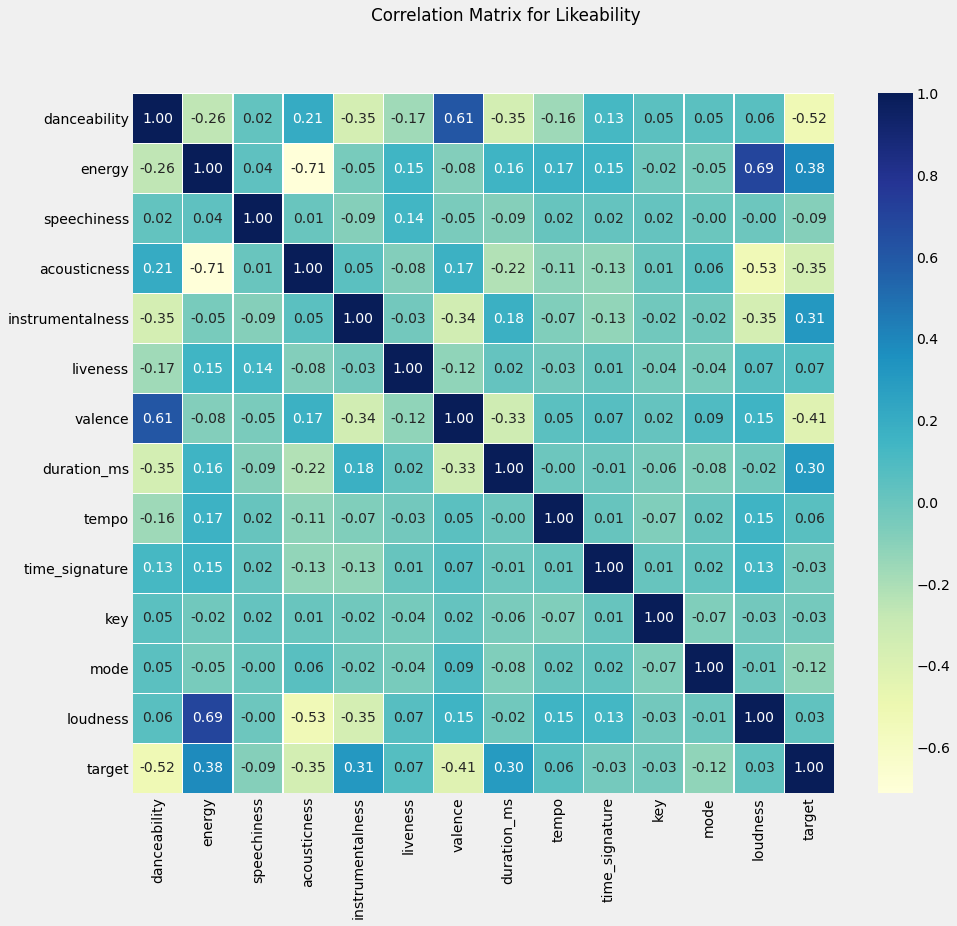

In [ ]:
#Plotting the correlation matrix using seaborns heatmap
corr_matrix = songs_df.drop("duration_m", axis=1).corr()

fig,ax = plt.subplots(figsize=(14,12))
fig.suptitle("Correlation Matrix for Likeability", x=0.45)
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 fmt="0.2f", 
                 linewidths=0.2, 
                 cmap="YlGnBu")


**Correlation Matrix**

The target label is highly correlated to subjective feature than the objective features like, loudness, tempo, mode, key or time signature. 

Positive corralated features:

* Energy: 0.38
* Instrumentalness: 0.31
* Duration: 0.30

Negative correlated features: 

* Danceability: -0.52
* Accousticness: -0.35
* Valence: -0.41

Depending on the model it will stablish a priority over certain correlation values.  

## 5. Modeling 

Now that we know how both playlist are behaving. Is time to prepare the data to train a set of base model to build. 

This previous preparation is important since the models can get confused with how the features are working

Not doing this may misslead the model into wrong predictions. 

To do: 

1. Transform Categorical Features 
) 
2. Standarize the data. 

*This can be a experiment to improve the performance of the model since it is not relevant for liking a song*

From the analysis above we have two categorical features: Mode and Key. This features indicate with integer numbers in which key the song is. 

In [ ]:
## Standarizing the data. 
from sklearn.preprocessing import StandardScaler
# creating a new dataframe. 
std_songs_df = songs_df.drop(["mode","key","time_signature","duration_ms","id"], axis=1)

# Create an instance of the scaler
scaler = StandardScaler()

# fit the scaler with NUMERICAL VALUES and WITHOUT the TARGET
scaler.fit(std_songs_df.drop("target", axis=1))

# Scale the features. 

scaled_features = scaler.transform(std_songs_df.drop("target", axis=1))

songs_df_standarized_features = pd.DataFrame(scaled_features, columns=std_songs_df.columns[:-1])

#Separate Features and Labels
X = songs_df_standarized_features
y = std_songs_df["target"]



In [ ]:
#Split into Training and Testing Sets
np.random.seed(987)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Check the Training and Testing set sizes
len(X_train), len(X_test), len(y_train), len(y_test)

(1962, 491, 1962, 491)

In [ ]:
#Fitting the models 

# Store the models in a dictionary: 

models = {"Logistic Regression": LogisticRegression(),
          "KNeighborsClassifier": KNeighborsClassifier(),
          "RandomForestClassifier": RandomForestClassifier()}



In [ ]:
# Define a function to train the models all at once.

def fit_and_score_models(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models. 
    
    models: a dictionary with different sklearn models. 
    X_train: training data, no labels.
    X_test: test data, no labels.
    y_train: training labels.
    y_test: test labels.
    
    '''
    # Fix a seed
    np.random.seed(42)
    
    #Create a dic to store the scores:
    model_scores= {}
    
    #train and test the model. 
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
        
    return model_scores

In [ ]:
base_scores = fit_and_score_models(models, X_train,X_test,y_train,y_test)
base_scores

{'KNeighborsClassifier': 0.7881873727087576,
 'Logistic Regression': 0.8228105906313645,
 'RandomForestClassifier': 0.8207739307535642}

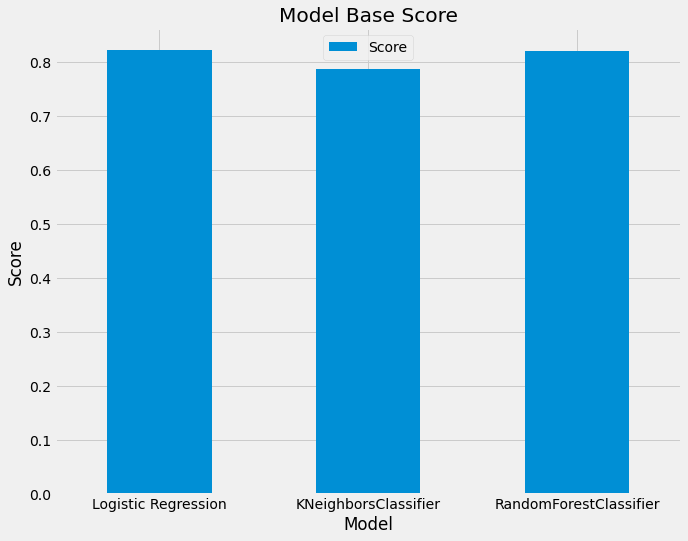

In [ ]:
# Plot the results. 

model_base_scores = pd.DataFrame(base_scores.items(), columns=["Model","Score"])
model_base_scores.plot.bar(figsize=(10,8))

plt.title("Model Base Score")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=0,ticks=[0,1,2],labels=models.keys());

### Tuning the Base Models

Is there a way to improve the base model ? 

Every model is above the goal, but let's try to improve the performance by making a series of experiments. 
 
1. RandomizeSearchCV - This method takes a random set of predefined values for parameters and tries a number of stablished combinations to find the best possible. 

2. GridSearchCV - Tries all the combination of a set of predifined values for the parameters. 

Information on tuning KNN : https://www.datasklr.com/select-classification-methods/k-nearest-neighbors

Information on tuning RFC and LR : https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5





In [ ]:
tunned_models = {}

In [ ]:
# Lets try RandomizedSearch First. 

#KNN tunnable parameters: 

knn_parameters = {"n_neighbors": [1,3,5,8,13,21],
                  "leaf_size": [20,40,1],
                  "p": [1,2],
                  "weights": ["uniform","distance"],
                  "metric": ["minkowski","chebyshev"]}

#Instanciate the KNN Classifier
knn = KNeighborsClassifier()

#Fix a seed
np.random.seed(987)

#Initialize the RandomizedSearch
rs_knn = RandomizedSearchCV(estimator=knn,
                            param_distributions=knn_parameters,
                            cv=5,
                            n_iter=50,
                            verbose=True
                            )

#Fit the model 
rs_knn.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    7.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'leaf_size': [20, 40, 1],
                                        'metric': ['minkowski', 'chebyshev'],
                                        'n_neighbors': [1, 3, 5, 8, 13, 21],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, s

In [ ]:
rs_knn.best_params_

{'leaf_size': 20,
 'metric': 'chebyshev',
 'n_neighbors': 8,
 'p': 2,
 'weights': 'distance'}

In [ ]:
tunned_models["KNN RS"]= rs_knn.score(X_test,y_test)
rs_knn.score(X_test,y_test)

0.8126272912423625

In [ ]:
knn_parameters

{'leaf_size': [20, 40, 1],
 'metric': ['minkowski', 'chebyshev'],
 'n_neighbors': [1, 3, 5, 8, 13, 21],
 'p': [1, 2],
 'weights': ['uniform', 'distance']}

In [ ]:
# Lets try now GridSearch: 

knn_parameters_2 = {"leaf_size":[20,40,1],
                    "metric":["minkowski","chebyshev"],
                    "n_neighbors":[8,13,21],
                    "p":[1,2],
                    "weights":["uniform","distance"]}

#Fix a seed
np.random.seed(987)

#instanciate the model
gs_knn = GridSearchCV(estimator=knn,
                      param_grid=knn_parameters_2,
                      cv=5,
                      verbose=True)
#train the model
gs_knn.fit(X_train,y_train)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   11.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [20, 40, 1],
                         'metric': ['minkowski', 'chebyshev'],
                         'n_neighbors': [8, 13, 21], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [ ]:
gs_knn.best_params_

{'leaf_size': 20,
 'metric': 'chebyshev',
 'n_neighbors': 8,
 'p': 1,
 'weights': 'distance'}

In [ ]:
tunned_models["KNN GS"]=gs_knn.score(X_test,y_test)
gs_knn.score(X_test,y_test)

0.8126272912423625

In [ ]:
## Lets try the LogisticRegression

# LogisticRegression parameters
log_reg_params = {"penalty":["l1","l2"],
                  "C": np.logspace(-4,4,100),
                  "solver":["liblinear"]}

#Instanciate the LR                
lr = LogisticRegression()

#Fix a seed
np.random.seed(987)

#Instanciate the RandomizedSearch
rs_lr = RandomizedSearchCV(estimator=lr,
                           param_distributions=log_reg_params,
                           cv=5,
                           n_iter=60,
                           verbose=True)

# Fit the model 
rs_lr.fit(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=60, n_jobs=None,
                   param_distributions={'C':...
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+0

In [ ]:
rs_lr.best_params_

{'C': 0.521400828799969, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
tunned_models["LR RS"]=rs_lr.score(X_test,y_test)
rs_lr.score(X_test,y_test)

0.8228105906313645

In [ ]:
#GridSearch

#Fix a seed
np.random.seed(987)

#Instaciate the GS
gs_lr = GridSearchCV(estimator=lr, 
                     param_grid=log_reg_params,
                     cv=5,
                     verbose=True)

#Train the model 

gs_lr.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.2...
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
      

In [ ]:
gs_lr.best_params_

{'C': 0.521400828799969, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
tunned_models["LR GS"]=gs_lr.score(X_test,y_test)
gs_lr.score(X_test,y_test)

0.8228105906313645

In [ ]:
#Lets try the RandomForestClassifier

# RFC tunnable parameters
rfc_params = {
             "max_depth": [None, 10,20,40,80,100],
             "max_features":["auto","sqrt"],
             "min_samples_leaf":[1,2,4],
             "min_samples_split":[2,5,10],
             "n_estimators":[200,400,800,1000,1400]}

# Instanciate the RFC 

rfc = RandomForestClassifier()

#Fix a Random Seed
np.random.seed(987)
#Instanciate the RandomizedSearch
rs_rfc = RandomizedSearchCV(estimator=rfc,
                            param_distributions=rfc_params,
                            cv=5,
                            n_iter=20,
                            verbose=2)

#train the model

rs_rfc.fit(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, total=   0.8s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, total=   5.3s
[CV] n_estimators=1400, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rs_rfc.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [ ]:
tunned_models["RFC RS"]=rs_rfc.score(X_test,y_test)
rs_rfc.score(X_test,y_test)

0.835030549898167

In [ ]:
# Trying GridSearchCV

rfc_params_2 = {'max_depth': [None, 10, 20],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [800, 1000, 1400]}

#Fix a Random Seed:
np.random.seed(987)

gs_rfc = GridSearchCV(estimator=rfc,
                      param_grid=rfc_params_2,
                      cv=5,
                      verbose=2)

#Fit the model

gs_rfc.fit(X_train,y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   3.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   3.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   3.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   3.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   3.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   4.0s
[CV] max_depth=None, max_feature

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 12.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
gs_rfc.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 800}

In [ ]:
tunned_models["RFC GS"]=gs_rfc.score(X_test,y_test)
gs_rfc.score(X_test,y_test)

0.8391038696537678

### Tunned Model Scores

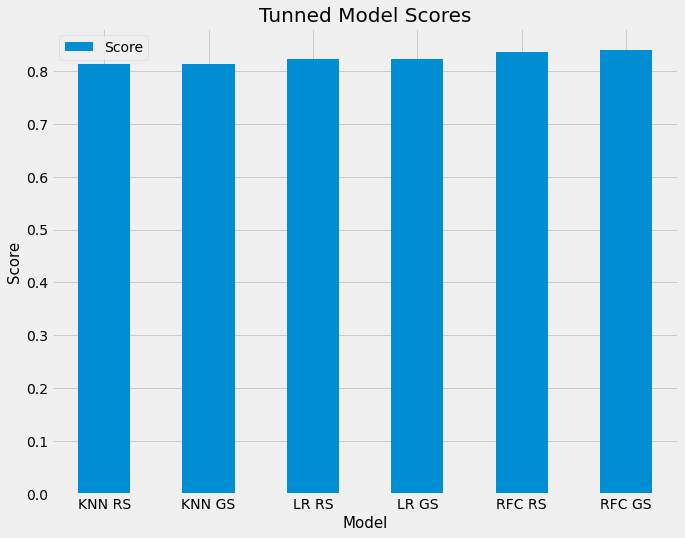

In [ ]:
# plot 

tunned_models_score = pd.DataFrame(tunned_models.items(), columns=["Model","Score"])

tunned_models_score.plot.bar(figsize=(10,8))
plt.title("Tunned Model Scores",fontsize=20)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.xticks(rotation=0, ticks=[x for x in range(6)], labels=["KNN RS","KNN GS", "LR RS", "LR GS", "RFC RS", "RFC GS"]);

In [ ]:
tunned_models

{'KNN GS': 0.8126272912423625,
 'KNN RS': 0.8126272912423625,
 'LR GS': 0.8228105906313645,
 'LR RS': 0.8228105906313645,
 'RFC GS': 0.8391038696537678,
 'RFC RS': 0.835030549898167}

In [ ]:
# Check the BEST PARAMETERS Here
gs_rfc.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 800}

### Summary

After tunning the base models using the RandomizedSearchCV and the GridSearchCV. 

The RandomForestClassifier was the model with the highest accuracy score on the test set.

In order to evaluate the models we need to instanciate and tunning them with the calculated parameters

In [ ]:
# Creating the new tunned models.

tunned_knn = KNeighborsClassifier(leaf_size=20, metric="chebyshev",n_neighbors=8, p=1, weights="distance")
tunned_lr = LogisticRegression(C=0.521400828799969, penalty='l1', solver='liblinear')
tunned_rfc = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=800)


In [ ]:
#Make predictions for the evaluation phase. 

tunned_clf = [tunned_knn, tunned_lr, tunned_rfc]

for clf in tunned_clf:
  np.random.seed(42)
  clf.fit(X_train, y_train)



y_preds_knn = tunned_knn.predict(X_test)
y_preds_lr = tunned_lr.predict(X_test)
y_preds_rfc = tunned_rfc.predict(X_test)



## 6. Evaluation

To do list:

* ROC ( *Receiver Operating Characterisctic*) curve and AUC
* Confusion Matrix
* Classification Report
* Accuracy.
* Precision
* Recall
* F1 score

### ROC Curve

The Receiver Operating Characteristic Curve represent the accuracy of the model. 

It answers the next question. 

How often the model will predict a False value against a True value?

In [ ]:
# Plot the Receiver Operating Characteristic Curve 
from sklearn.metrics import roc_curve

def calculate_tpr_and_fpr(model, X_test, y_test):
  '''
  This function returns the true positive rate and the false positive rate. 

  '''
  #Calculate the probabilities.
  y_proba = model.predict_proba(X_test)

  #Take the positive probability_
  y_proba_positive = y_proba[:,1]

  fpr, tpr, threshold = roc_curve(y_test,y_proba_positive )

  return fpr, tpr





Text(0, 0.5, 'True Positive Rate (TPR)')

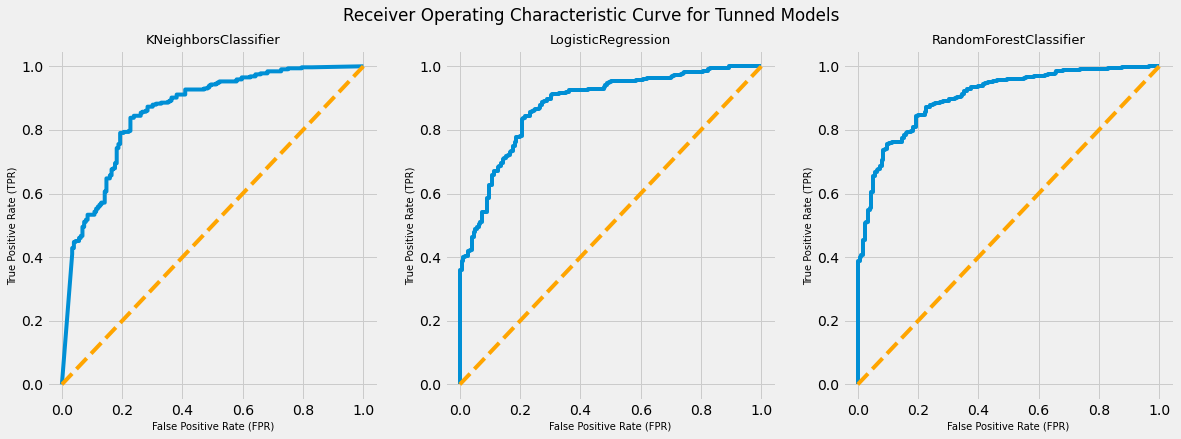

In [ ]:
# Plot the ROC curve

fpr_knn, tpr_knn = calculate_tpr_and_fpr(tunned_knn,X_test,y_test)
fpr_lr, tpr_lr = calculate_tpr_and_fpr(tunned_lr,X_test,y_test)
fpr_rfc, tpr_rfc = calculate_tpr_and_fpr(tunned_rfc, X_test, y_test)

plt.style.use("fivethirtyeight")
fig,ax = plt.subplots(1,3, figsize=(18,6))

fig.suptitle("Receiver Operating Characteristic Curve for Tunned Models")

# KNN
ax[0].plot(fpr_knn,tpr_knn, label="ROC")
ax[0].plot([0,1],[0,1], color="orange", linestyle="--", label="Guessing")
ax[0].set_title("KNeighborsClassifier", fontsize=13)
ax[0].set_xlabel("False Positive Rate (FPR)", fontsize=10)
ax[0].set_ylabel("True Positive Rate (TPR)", fontsize=10)

#LR
ax[1].plot(fpr_lr,tpr_lr, label="ROC")
ax[1].plot([0,1],[0,1], color="orange", linestyle="--", label="Guessing")
ax[1].set_title("LogisticRegression", fontsize=13)
ax[1].set_xlabel("False Positive Rate (FPR)", fontsize=10)
ax[1].set_ylabel("True Positive Rate (TPR)", fontsize=10)

#RFC
ax[2].plot(fpr_rfc,tpr_rfc, label="ROC")
ax[2].plot([0,1],[0,1], color="orange", linestyle="--", label="Guessing")
ax[2].set_title("RandomForestClassifier", fontsize=13)
ax[2].set_xlabel("False Positive Rate (FPR)", fontsize=10)
ax[2].set_ylabel("True Positive Rate (TPR)", fontsize=10)




**Interpretation of the ROC**

The biggest AUC of the 3 ROC Curves is the one of the RandomForestClassifier. This means that the model has an overall better accouracy than the other KNClassifier and the LogisticRegression clasifier. 

### Confusion Matrix 

A confusion Matrix show us how the classification model makes mistakes. 

Is the model having difficulties to put a asign a categorie to the target?


In [ ]:
# Create the confusion matrix for each model 

conf_mtx_knn = confusion_matrix(y_test,y_preds_knn)
conf_mtx_lr = confusion_matrix(y_test, y_preds_lr)
conf_mtx_rfc = confusion_matrix(y_test, y_preds_rfc)

conf_mtx_knn

array([[130,  46],
       [ 46, 269]])

In [ ]:

def plot_conf_matrix(y_test,y_preds,title):
    '''
    Plots a confusion matrix using Seaborn's heatmap
    '''
    fig,ax = plt.subplots(figsize=(10,8))
    
    ax = sns.heatmap(confusion_matrix(y_preds,y_test),
                    annot=True,
                    fmt="0.2f")
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.title(title)

### Confusion Matrix PLOTS

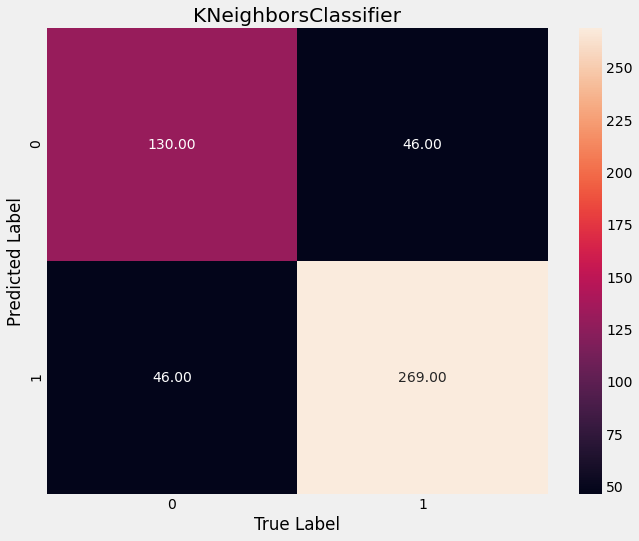

In [ ]:
plot_conf_matrix(y_test, y_preds_knn,"KNeighborsClassifier")


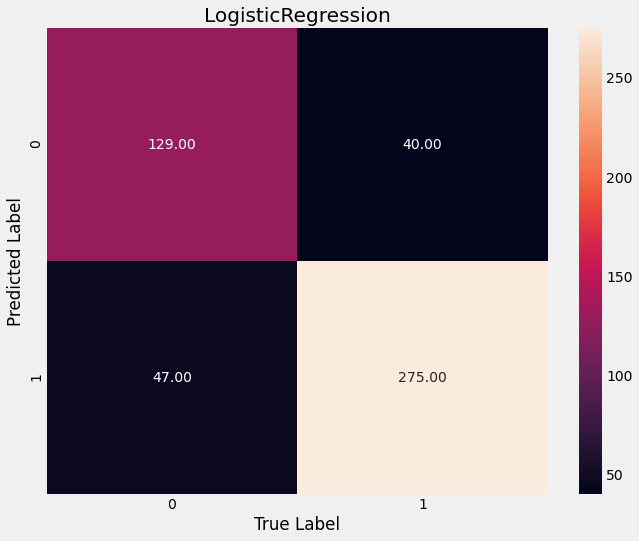

In [ ]:
plot_conf_matrix(y_test, y_preds_lr,"LogisticRegression")

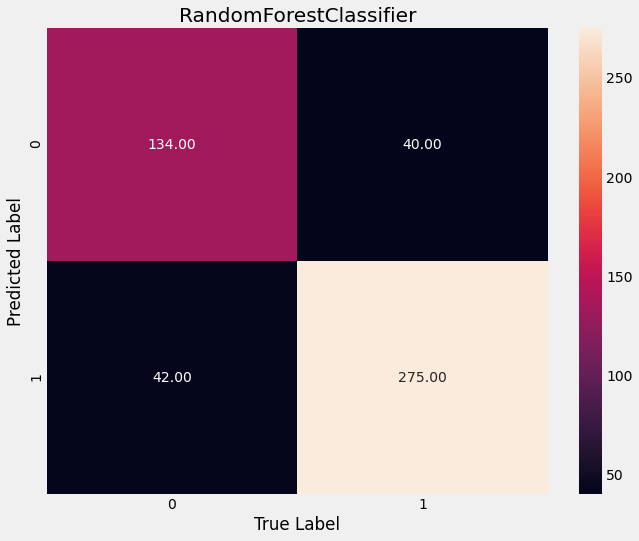

In [ ]:
plot_conf_matrix(y_test, y_preds_rfc,"RandomForestClassifier")

**Interpretation**

The models are struggling to recognice a negative label. I will guess and point that this behavior is due to the difference of the ammount of data in the negative set.

However the model can recognize better a positive target.

### Classification Report

The classification report display the different scores for the model performance. 

* **Precision**: Positive identification aka correctly determining a category.

* **Recall**: Portion of the positive identification that were actually correct

* **f1**: Combination of the precision and recall. 


In [ ]:
#KNeighborsClassifier 

cr_for_knn = classification_report(y_test,y_preds_knn)

print(cr_for_knn)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       176
           1       0.85      0.85      0.85       315

    accuracy                           0.81       491
   macro avg       0.80      0.80      0.80       491
weighted avg       0.81      0.81      0.81       491



In [ ]:
#LogisticRegressionClassifier 

cr_for_lr = classification_report(y_test,y_preds_lr)

print(cr_for_lr)

              precision    recall  f1-score   support

           0       0.76      0.73      0.75       176
           1       0.85      0.87      0.86       315

    accuracy                           0.82       491
   macro avg       0.81      0.80      0.81       491
weighted avg       0.82      0.82      0.82       491



In [ ]:
#RandomForestClassifier

cr_for_rfc = classification_report(y_test,y_preds_rfc)

print(cr_for_rfc)

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       176
           1       0.87      0.87      0.87       315

    accuracy                           0.83       491
   macro avg       0.82      0.82      0.82       491
weighted avg       0.83      0.83      0.83       491



### Cross Validation Scores 

Get a better insight on accuracy, precision, recal and f1 scores for different test sets.

This will allow us to have a better understanding on how the model behaves on different data compositions and splits


In [ ]:
# Cross Validate Scores for KNN

# instanciate a new KNN model. 

clf_knn = KNeighborsClassifier(leaf_size=20, metric="chebyshev",n_neighbors=8, p=1, weights="distance")

np.random.seed(987)
accuracy_knn = cross_val_score(clf_knn, X, y, cv=5, scoring="accuracy")
accuracy_knn = np.mean(accuracy_knn)

np.random.seed(987)
precision_knn = cross_val_score(clf_knn, X, y, cv=5, scoring="precision")
precision_knn = np.mean(precision_knn)

np.random.seed(987)
recall_knn = cross_val_score(clf_knn, X, y, cv=5, scoring="recall")
recall_knn = np.mean(recall_knn)

np.random.seed(987)
f1_knn = cross_val_score(clf_knn, X, y, cv=5, scoring="f1")
f1_knn = np.mean(f1_knn)


cv_knn_scores = { "Accuracy": accuracy_knn,
                  "Precision": precision_knn,
                  "Recall": recall_knn,
                  "F1": f1_knn}

cv_knn_df = pd.DataFrame(cv_knn_scores, index=[0])

cv_knn_df


,Accuracy,Precision,Recall,F1
0,0.803909,0.826994,0.86299,0.842869


In [ ]:
# Cross Validate Scores for LR

# instanciate a new LR model. 

clf_LR = LogisticRegression(C=0.521400828799969, penalty='l1', solver='liblinear')

np.random.seed(987)
accuracy_LR = cross_val_score(clf_LR, X, y, cv=5, scoring="accuracy")
accuracy_LR = np.mean(accuracy_LR)

np.random.seed(987)
precision_LR = cross_val_score(clf_LR, X, y, cv=5, scoring="precision")
precision_LR = np.mean(precision_LR)

np.random.seed(987)
recall_LR = cross_val_score(clf_LR, X, y, cv=5, scoring="recall")
recall_LR = np.mean(recall_LR)

np.random.seed(987)
f1_LR = cross_val_score(clf_LR, X, y, cv=5, scoring="f1")
f1_LR = np.mean(f1_LR)


cv_LR_scores = { "Accuracy": accuracy_LR,
                  "Precision": precision_LR,
                  "Recall": recall_LR,
                  "F1": f1_LR}

cv_LR_df = pd.DataFrame(cv_LR_scores, index=[0])

cv_LR_df

,Accuracy,Precision,Recall,F1
0,0.802278,0.821576,0.870905,0.842288


In [ ]:
# Cross Validate Scores for RFC

# instanciate a new RFC model. 

clf_RFC = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=800)

np.random.seed(987)
accuracy_RFC = cross_val_score(clf_RFC, X, y, cv=5, scoring="accuracy")
accuracy_RFC = np.mean(accuracy_RFC)

np.random.seed(987)
precision_RFC = cross_val_score(clf_RFC, X, y, cv=5, scoring="precision")
precision_RFC = np.mean(precision_RFC)

np.random.seed(987)
recall_RFC = cross_val_score(clf_RFC, X, y, cv=5, scoring="recall")
recall_RFC = np.mean(recall_RFC)

np.random.seed(987)
f1_RFC = cross_val_score(clf_RFC, X, y, cv=5, scoring="f1")
f1_RFC = np.mean(f1_RFC)


cv_RFC_scores = { "Accuracy": accuracy_RFC,
                  "Precision": precision_RFC,
                  "Recall": recall_RFC,
                  "F1": f1_RFC}

cv_RFC_df = pd.DataFrame(cv_RFC_scores, index=[0])

cv_RFC_df

,Accuracy,Precision,Recall,F1
0,0.809608,0.834814,0.864942,0.846103


### Average Classification Score using CV PLOT.

Score in Cross Validation sets

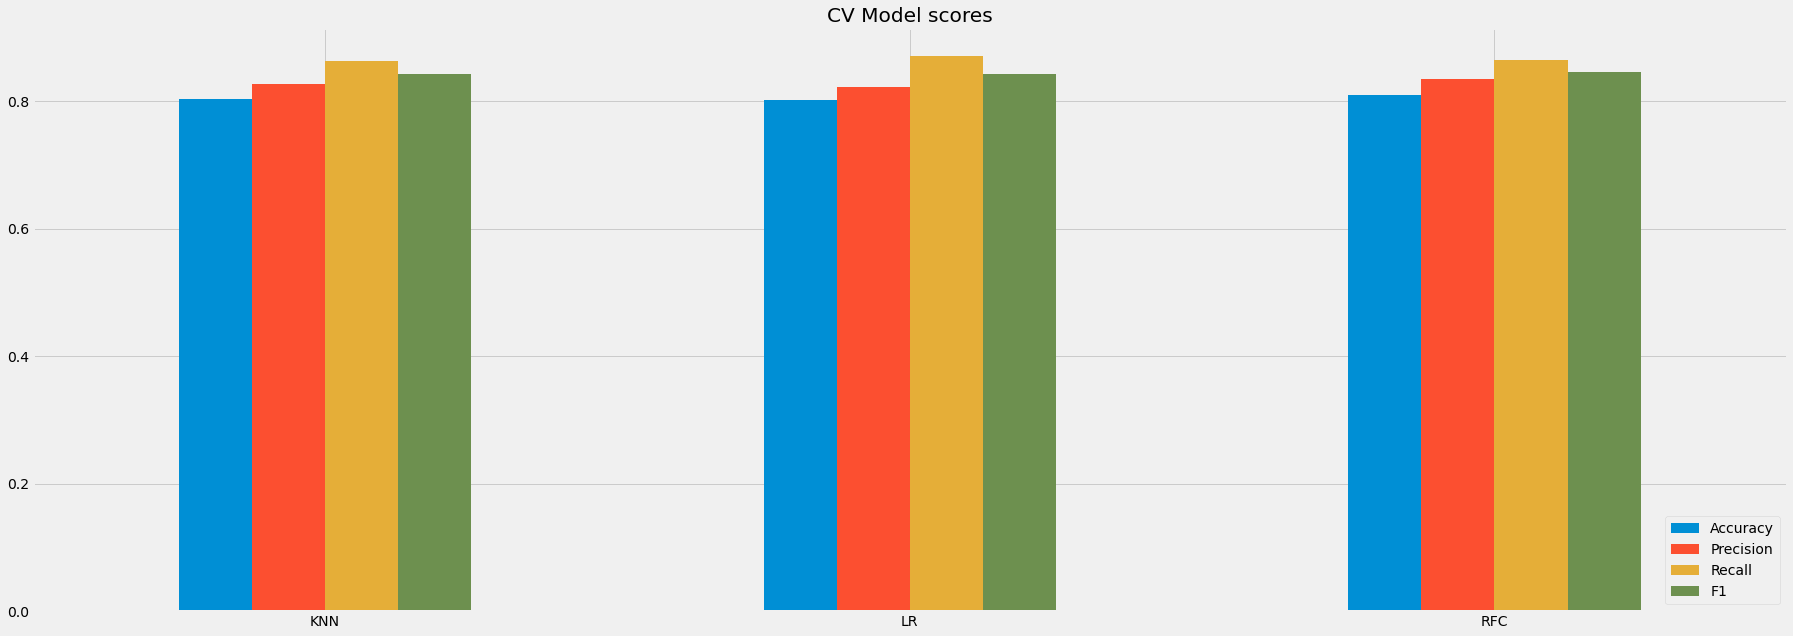

In [ ]:
clf_scores_df = pd.concat([cv_knn_df,cv_LR_df,cv_RFC_df], ignore_index=True)

clf_scores_df["Model"] = ["KNN", "LR", "RFC"]

clf_scores_df.plot.bar(title="CV Model scores", figsize=(28,10))
plt.legend(loc="lower right")
plt.xticks(rotation=0, ticks=[0,1,2], labels=clf_scores_df.Model);

In [ ]:
clf_scores_df

,Accuracy,Precision,Recall,F1,Model
0,0.803909,0.826994,0.862990,0.842869,KNN
1,0.802278,0.821576,0.870905,0.842288,LR
2,0.809608,0.834814,0.864942,0.846103,RFC


## 7. Saving

Export the trained models to future implementation. 



In [ ]:
# Saving the models. 
#from joblib import dump, load

#Saving the Models 
#dump(clf_knn, filename="KNeighborClassifier_spotify.joblib")
#dump(clf_LR, filename="LogisticRegression_spotify.joblib")
#dump(clf_RFC, filename="#")


In [ ]:
#loaded_rfc = load("./classifiers/RandomForestClassifier_spotify.joblib")
#loaded_rfc.fit(X_train,y_train)
#loaded_rfc.score(X_test,y_test)

## 8. Experiments

### Preparation
Download some spotify playlists and see how the models predic based on their training. 

Loading the previous trained models... 

Things to do before making the experiments:

* Re import essential libraries.
* Import the dataframe.
* Import the models.
* Scale the data.
* Fit the models and get some predictions.
* Retrieve the song names. 
* Create a new DF with the test sets and the predictions.
* Compare the True vs the predictions






### Import libraries and data

Loading the data and the models.

In [ ]:
!pip install spotipy

In [ ]:
# Import Libraries  and train the models...

# Import spotipy and the authorization library
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

# Notebook care
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

#Import model 
from joblib import dump, load

# ignore Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Evaluation
from sklearn.model_selection import train_test_split


# Load the models
load_clf_knn = load("./KNeighborClassifier_spotify.joblib")
load_clf_lr = load("./LogisticRegression_spotify.joblib")
load_clf_rfc = load("./RandomForestClassifier_spotify.joblib")

loaded_models = [ load_clf_knn, load_clf_lr, load_clf_rfc]


In [ ]:
#Re load the database for training the loaded models. 

loaded_df = pd.read_csv("./songs_dataframe.csv").drop("Unnamed: 0", axis=1)
loaded_df.tail()


,id,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,duration_m,tempo,time_signature,key,mode,loudness,target
2448,1uFl33ahAD59XrccuSxpkz,0.399,0.398,0.0335,0.0568,0.0,0.281,0.483,220155,3.669250,159.810,4,0,1,-7.309,0
2449,5cWIowEZxB2FkZ1Hzqpwjl,0.826,0.928,0.0336,0.1810,0.0,0.296,0.967,165787,2.763117,139.033,4,11,0,-4.181,0
2450,71iAechwVKGu26pahzFL0k,0.806,0.778,0.0616,0.1330,0.0,0.218,0.840,219587,3.659783,95.993,4,1,0,-4.577,0
2451,6z1wOs7wdx5HSn6PMDoc4s,0.612,0.748,0.0462,0.6540,0.0,0.115,0.416,211046,3.517433,147.978,4,2,1,-5.503,0
2452,5T1MmDTBxXdCzIK0d76fQs,0.741,0.191,0.0451,0.8020,0.0,0.127,0.351,118728,1.978800,112.567,3,7,1,-9.879,0


### Standarize the data

Standarizing and splitting the data into the Training and Testing sets

In [ ]:
## Standarizing the data. 
from sklearn.preprocessing import StandardScaler
# creating a new dataframe. 
std_songs_df = loaded_df.drop(["mode","key","time_signature","duration_ms","id"], axis=1)

# Create an instance of the scaler
scaler = StandardScaler()

# fit the scaler with NUMERICAL VALUES and WITHOUT the TARGET
scaler.fit(std_songs_df.drop("target", axis=1))

# Scale the features. 

scaled_features = scaler.transform(std_songs_df.drop("target", axis=1))

songs_df_standarized_features = pd.DataFrame(scaled_features, columns=std_songs_df.columns[:-1])

#Separate Features and Labels
X = songs_df_standarized_features
y = std_songs_df["target"]

#Split into Train and test sets...
np.random.seed(987)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

len(X_train)



1962

### Training and Predictions

Fitting the models and making predictions with them.

In [ ]:
#Train the models: 

for model in loaded_models:
  np.random.seed(987)
  model.fit(X_train,y_train)

y_knn_preds = load_clf_knn.predict(X_test)
y_lr_preds = load_clf_lr.predict(X_test)
y_rfc_preds = load_clf_rfc.predict(X_test)

load_clf_knn.score(X_test,y_test)



0.8126272912423625

### Creating a new data frame 

* Looking for the index in the original DF
* Dropping unnecessary features
* Retrieve songs from Spotify using the ID
* Sorting Features
* Adding predictions

In [ ]:
#Create a Dataframe with the names and predictions

index_list = []

for index in X_test.index:
  index_list.append(index)

index_list[:10]

# Retrieving the indices
full_test_df = loaded_df.loc[index_list, :]

full_test_df.drop(["danceability","energy","speechiness","acousticness", "instrumentalness", "liveness","valence",
                   "duration_ms", "duration_m","tempo", "time_signature", "key", "mode", "loudness"], axis=1, inplace=True)

full_test_df.head()

,id,target
2412,6OoPfZHS4URjNBUZPhvUpo,0
1315,4yf3jFkdPSDZETAKid2Jtf,1
1302,1ltXouqGNJs4bdm4FnlWdp,1
769,7866E49sLyI938dEqxi8a4,1
805,4jrCMOG9OPe6iF4vWFxatb,1


In [ ]:
name_list = []

for id in full_test_df.id:
  name_list.append(sp.track(f"{id}")["name"])


full_test_df["Names"] = name_list

full_test_df.head()

,id,target,Names
2412,6OoPfZHS4URjNBUZPhvUpo,0,Noche Inolvidable
1315,4yf3jFkdPSDZETAKid2Jtf,1,Falling World
1302,1ltXouqGNJs4bdm4FnlWdp,1,Ungrateful
769,7866E49sLyI938dEqxi8a4,1,Fade To Black - Remastered
805,4jrCMOG9OPe6iF4vWFxatb,1,Take a Bow


In [ ]:
# Re arrange and add the predictions. 
full_test_df = full_test_df[["Names", "id", "target"]]

full_test_df["KNN"] = y_knn_preds
full_test_df["LR"]= y_lr_preds
full_test_df["RFC"]= y_rfc_preds



In [ ]:
## Average score

full_test_df["% Score"] = (full_test_df.KNN + full_test_df.LR + full_test_df.RFC)/3

### Displaying predictions. 

**Using RandomForestClassifier as main indicator and KNN and LR as secondary indicators** 

Display the RFC False Negatives. The False negative reveal where the model mistake a like for a dislike.

Use the % Score as an indicator for what the user may like.


In [ ]:
#Display RFC  False Negatives :D
full_test_df.loc[(full_test_df["target"]==1 ) & (full_test_df["RFC"]==0)][:7]

,Names,id,target,KNN,LR,RFC,% Score
961,MakeDamnSure,48O6kz322Dzu1R6Al5147q,1,1,1,0,0.666667
1082,Seven Nation Army,3m6KkYKdnbffMpGd9Pm9FP,1,0,0,0,0.000000
1508,Nunca Jamás,6x8ACEr6yQsT81Q0fmHDcS,1,1,1,0,0.666667
744,Desde mi cielo,7mGOuPMLa2HghuRANiGYf9,1,0,0,0,0.000000
1486,ocean eyes,2uIX8YMNjGMD7441kqyyNU,1,0,0,0,0.000000
1172,Open Arms,2w4EpqGasrz9qdTwocx54t,1,0,0,0,0.000000
862,crushcrushcrush,4m9NfjevXsDVaLtM1kj0Sx,1,0,0,0,0.000000
